<a href="https://colab.research.google.com/github/HimanshuPathak2725/googleColab/blob/main/DualityAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/Colab Notebooks/Hackathon_Dataset.zip

unzip:  cannot find or open /content/drive/MyDrive/Colab, /content/drive/MyDrive/Colab.zip or /content/drive/MyDrive/Colab.ZIP.


In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Hackathon_Dataset.zip" -d /content/project

Archive:  /content/drive/MyDrive/Colab Notebooks/Hackathon_Dataset.zip
   creating: /content/project/HackByte_Dataset/
  inflating: /content/project/HackByte_Dataset/classes.txt  
   creating: /content/project/HackByte_Dataset/data/
   creating: /content/project/HackByte_Dataset/data/test/
   creating: /content/project/HackByte_Dataset/data/test/images/
  inflating: /content/project/HackByte_Dataset/data/test/images/000000000.png  
  inflating: /content/project/HackByte_Dataset/data/test/images/000000001.png  
  inflating: /content/project/HackByte_Dataset/data/test/images/000000002.png  
  inflating: /content/project/HackByte_Dataset/data/test/images/000000003.png  
  inflating: /content/project/HackByte_Dataset/data/test/images/000000004.png  
  inflating: /content/project/HackByte_Dataset/data/test/images/000000005.png  
  inflating: /content/project/HackByte_Dataset/data/test/images/000000006.png  
  inflating: /content/project/HackByte_Dataset/data/test/images/000000007.png  
  in

In [3]:
%cd /content/project

/content/project


In [4]:
!pip install ultralytics torch torchvision torchaudio opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00


In [5]:
!python train.py

python3: can't open file '/content/project/train.py': [Errno 2] No such file or directory


In [6]:
%cd /content/project/HackByte_Dataset

/content/project/HackByte_Dataset


In [7]:
!python train.py

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/project/HackByte_Dataset/yolo_params.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, kera

In [8]:
!python predict.py


image 1/1 /content/project/HackByte_Dataset/data/test/images/1000000031.png: 384x640 (no detections), 68.7ms
Speed: 3.6ms preprocess, 68.7ms inference, 55.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/project/HackByte_Dataset/data/test/images/2000000016.png: 384x640 1 OxygenTank, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 90.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/project/HackByte_Dataset/data/test/images/000000007.png: 384x640 1 FireExtinguisher, 1 ToolBox, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/project/HackByte_Dataset/data/test/images/2000000050.png: 384x640 (no detections), 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/project/HackByte_Dataset/data/test/images/3000000017.png: 384x640 1 FireExtinguisher, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.6m

In [10]:
!python visualize.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.12/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



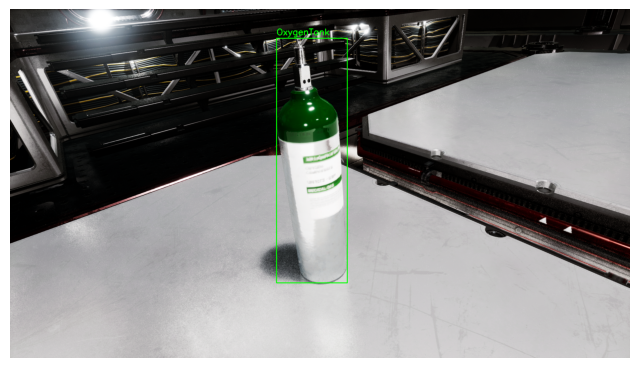

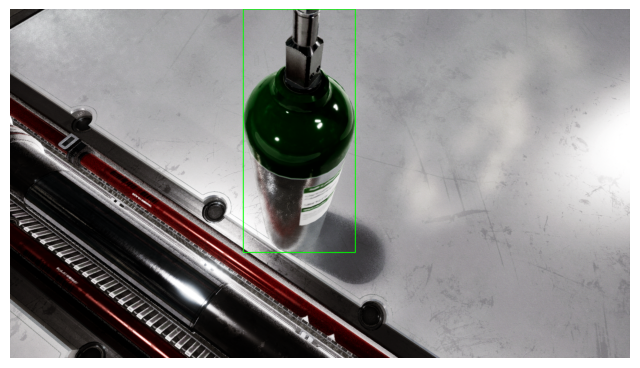

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

class YoloVisualizer:
    MODE_TRAIN = 0
    MODE_VAL = 1

    def __init__(self, dataset_folder):
        self.dataset_folder = dataset_folder
        classes_file = os.path.join(dataset_folder, "classes.txt")
        with open(classes_file, "r") as f:
            self.classes = f.read().splitlines()
        self.classes = {i: c for i, c in enumerate(self.classes)}
        self.set_mode(YoloVisualizer.MODE_TRAIN)

    def set_mode(self, mode=MODE_TRAIN):
        if mode == self.MODE_TRAIN:
            self.images_folder = os.path.join(self.dataset_folder, "data", "train", "images")
            self.labels_folder = os.path.join(self.dataset_folder, "data", "train", "labels")
        else:
            self.images_folder = os.path.join(self.dataset_folder, "data", "val", "images")
            self.labels_folder = os.path.join(self.dataset_folder, "data", "val", "labels")

        self.num_images = len(os.listdir(self.images_folder))
        self.label_names = sorted(os.listdir(self.labels_folder))
        self.image_names = sorted(os.listdir(self.images_folder))
        self.frame_index = 0

    def seek_frame(self, idx):
        image_file = os.path.join(self.images_folder, self.image_names[idx])
        label_file = os.path.join(self.labels_folder, self.label_names[idx])
        with open(label_file, "r") as f:
            lines = f.read().splitlines()

        image = cv2.imread(image_file)
        for line in lines:
            class_index, x, y, w, h = map(float, line.split())
            cx = int(x * image.shape[1])
            cy = int(y * image.shape[0])
            w = int(w * image.shape[1])
            h = int(h * image.shape[0])
            x = cx - w // 2
            y = cy - h // 2
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, self.classes[int(class_index)], (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        return image

    def show_frame(self, idx=0):
        frame = self.seek_frame(idx)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(frame)
        plt.axis("off")
        plt.show()

# ✅ Run this
dataset_folder = "/content/project/HackByte_Dataset"  # dataset path
vis = YoloVisualizer(dataset_folder)

# Example: first training image
vis.show_frame(0)

# Example: 10th training image
vis.show_frame(10)

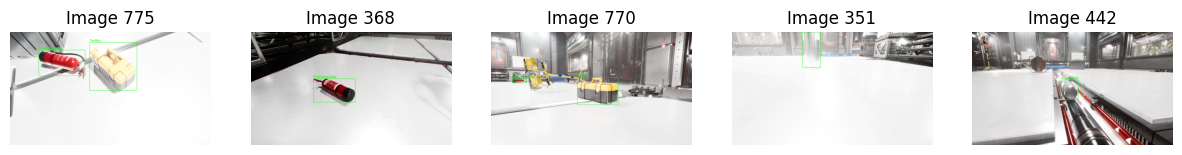

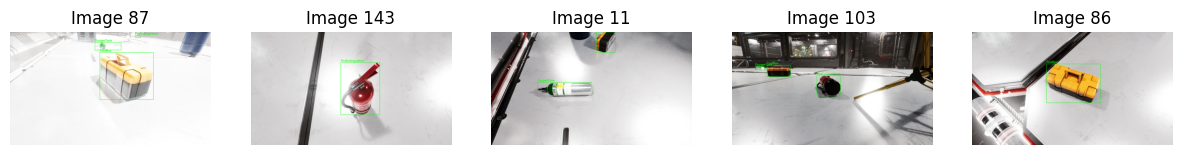

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
import random

class YoloVisualizer:
    MODE_TRAIN = 0
    MODE_VAL = 1
    def __init__(self, dataset_folder):
        self.dataset_folder = dataset_folder
        classes_file = os.path.join(dataset_folder, "classes.txt")
        with open(classes_file, "r") as f:
            self.classes = f.read().splitlines()
        self.classes = {i: c for i, c in enumerate(self.classes)}
        self.set_mode(YoloVisualizer.MODE_TRAIN)

    def set_mode(self, mode=MODE_TRAIN):
        if mode == self.MODE_TRAIN:
            self.images_folder = os.path.join(self.dataset_folder, "data", "train", "images")
            self.labels_folder = os.path.join(self.dataset_folder, "data", "train", "labels")
        else:
            self.images_folder = os.path.join(self.dataset_folder, "data", "val", "images")
            self.labels_folder = os.path.join(self.dataset_folder, "data", "val", "labels")
        self.num_images = len(os.listdir(self.images_folder))
        num_labels = len(os.listdir(self.labels_folder))
        self.label_names = sorted(os.listdir(self.labels_folder))
        self.image_names = sorted(os.listdir(self.images_folder))
        assert self.num_images == num_labels
        assert self.num_images > 0

    def seek_frame(self, idx):
        image_file = os.path.join(self.images_folder, self.image_names[idx])
        label_file = os.path.join(self.labels_folder, self.label_names[idx])
        with open(label_file, "r") as f:
            lines = f.read().splitlines()
        image = cv2.imread(image_file)
        for line in lines:
            class_index, x, y, w, h = map(float, line.split())
            cx = int(x * image.shape[1])
            cy = int(y * image.shape[0])
            w = int(w * image.shape[1])
            h = int(h * image.shape[0])
            x = cx - w // 2
            y = cy - h // 2
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, self.classes[int(class_index)], (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    def show_random_images(self, n=5):
        idxs = random.sample(range(self.num_images), min(n, self.num_images))
        plt.figure(figsize=(15, 8))
        for i, idx in enumerate(idxs):
            img = self.seek_frame(idx)
            plt.subplot(1, len(idxs), i+1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Image {idx}")
        plt.show()

# ✅ Use this
dataset_folder = "/content/project/HackByte_Dataset"
vis = YoloVisualizer(dataset_folder)

# Show 5 random training images
vis.show_random_images(5)

# Switch to validation set and show 5 random images
vis.set_mode(YoloVisualizer.MODE_VAL)
vis.show_random_images(5)